### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [ ]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
ingresos_por_tienda = df_total.groupby("Tienda")["Precio"].sum().reset_index()
ingresos_por_tienda.columns = ["Tienda", "Ingresos Totales"]

In [ ]:
print("Tiendas √∫nicas (por nombre gen√©rico):", df_total["Tienda"].unique())
print("Cantidad de tiendas distintas:", df_total["Tienda"].nunique())

print("\nUbicaciones distintas (Lugar de Compra):", df_total["Lugar de Compra"].unique())
print("Cantidad de ubicaciones distintas:", df_total["Lugar de Compra"].nunique())



Tiendas √∫nicas (por nombre gen√©rico): ['Tienda 1' 'Tienda 2' 'Tienda 3' 'Tienda 4']
Cantidad de tiendas distintas: 4

Ubicaciones distintas (Lugar de Compra): ['Bogot√°' 'Medell√≠n' 'Cartagena' 'Cali' 'Santa Marta' 'Pereira'
 'Barranquilla' 'Villavicencio' 'In√≠rida' 'C√∫cuta' 'Manizales' 'Neiva'
 'Bucaramanga' 'Valledupar' 'Pasto' 'Riohacha' 'Armenia' 'Leticia'
 'Soacha']
Cantidad de ubicaciones distintas: 19


In [ ]:
ingresos_por_tienda

Tienda  Ingresos Totales
0  Tienda 1      1.150880e+09
1  Tienda 2      1.116344e+09
2  Tienda 3      1.098020e+09
3  Tienda 4      1.038376e+09

### Comprobaci√≥n

In [ ]:
# Por ejemplo para Tienda 1
total_precio = df_total[df_total["Tienda"] == "Tienda 4"]["Precio"].sum()
print(total_precio)


1038375700.0


### Visualizaci√≥n

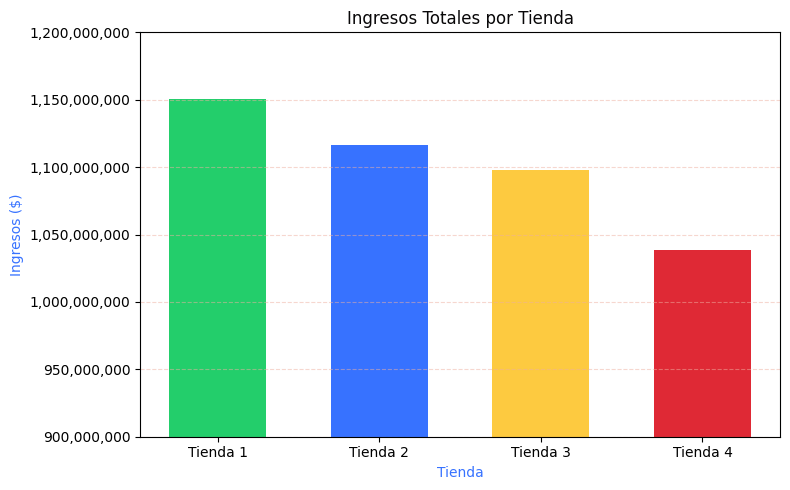

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Nueva paleta de colores
colores_paleta = ["#080708","#23CE6B", "#3772ff", "#fdca40", "#df2935", "#EFB0A1"]

# Crear la figura
plt.figure(figsize=(8, 5))

# Asignar un color distinto a cada barra
colores_barras = [colores_paleta[1], colores_paleta[2], colores_paleta[3], colores_paleta[4]]

# Crear el gr√°fico de barras con colores diferentes
plt.bar(ingresos_por_tienda["Tienda"], ingresos_por_tienda["Ingresos Totales"], color=colores_barras, width=0.6)

# Cambiar color del t√≠tulo y etiquetas
plt.title("Ingresos Totales por Tienda", color=colores_paleta[0])
plt.xlabel("Tienda", color=colores_paleta[2])
plt.ylabel("Ingresos ($)", color=colores_paleta[2])

# Limitar el rango del eje Y
plt.ylim(900_000_000, 1_200_000_000)  # Enfocar el rango relevante

# Personalizar el grid
plt.grid(axis="y", linestyle="--", alpha=0.5, color=colores_paleta[5])

# Mostrar etiquetas con separador de miles
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajustar para no cortar elementos
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


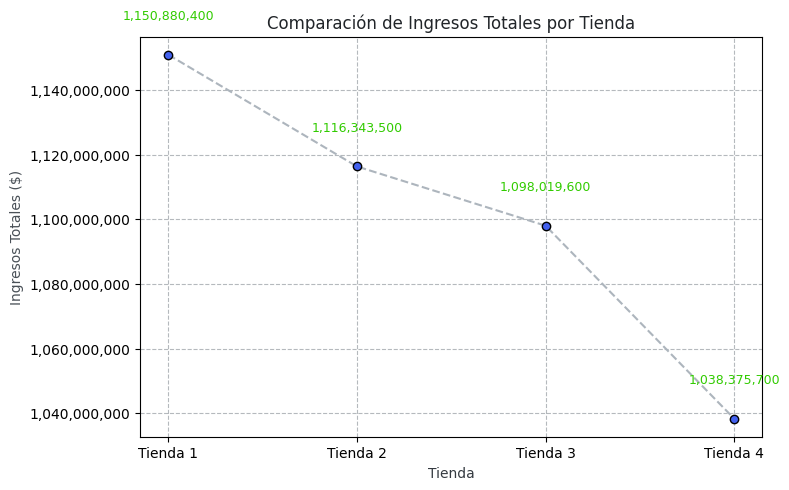

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Nueva paleta de colores
colores_paleta = ["#f8f9fa","#e9ecef","#dee2e6","#ced4da","#adb5bd","#6c757d","#495057","#343a40","#212529","#4361ee","#31cb00"]

# Ordenar por tienda para mantener coherencia visual
ingresos_linea = ingresos_por_tienda.sort_values("Tienda")

# Crear la figura
plt.figure(figsize=(8, 5))

# Cambiar color de la l√≠nea
plt.plot(ingresos_linea["Tienda"], ingresos_linea["Ingresos Totales"],
         marker='o', linestyle='--', color=colores_paleta[4], linewidth=1.5,
         markerfacecolor=colores_paleta[9], markeredgecolor='black')

# Cambiar color del t√≠tulo y etiquetas
plt.title("Comparaci√≥n de Ingresos Totales por Tienda", color=colores_paleta[8])
plt.xlabel("Tienda", color=colores_paleta[7])
plt.ylabel("Ingresos Totales ($)", color=colores_paleta[6])

# Personalizar el grid
plt.grid(True, linestyle="--", alpha=0.5, color=colores_paleta[5])

# Etiquetas de miles
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Cambiar el fondo del gr√°fico
#plt.gca().set_facecolor(colores_paleta[0])

# Mostrar valores sobre los puntos con un color de la paleta
for i, row in ingresos_linea.iterrows():
    plt.text(row["Tienda"], row["Ingresos Totales"] + 10_000_000,
             f'{int(row["Ingresos Totales"]):,}', ha='center', va='bottom',
             fontsize=9, color=colores_paleta[10])

# Ajustar para no cortar elementos
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


# 2. Ventas por categor√≠a

In [ ]:
df_total.columns

Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')

In [ ]:
ventas_por_categoria = df_total.groupby(["Tienda", "Categor√≠a del Producto"]).size().reset_index(name="Cantidad Vendida")
ventas_por_categoria


Tienda   Categor√≠a del Producto  Cantidad Vendida
0   Tienda 1  Art√≠culos para el hogar               171
1   Tienda 1     Deportes y diversi√≥n               284
2   Tienda 1        Electrodom√©sticos               312
3   Tienda 1             Electr√≥nicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Art√≠culos para el hogar               181
9   Tienda 2     Deportes y diversi√≥n               275
10  Tienda 2        Electrodom√©sticos               305
11  Tienda 2             Electr√≥nicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Muebles               442
16  Tienda 3  Art√≠culos para el hogar               177
17  Tienda 3     Deportes y diversi√≥n               277
18  Tienda 3        Electrodom√©sticos               278
19  Tienda 3             Electr√≥nicos               451
20  Tienda 3   Instrumentos musicales               177
21  Tienda 3                 Juguetes               315
22  Tienda 3                   Libros               185
23  Tienda 3                  Muebles               499
24  Tienda 4  Art√≠culos para el hogar               201
25  Tienda 4     Deportes y diversi√≥n               277
26  Tienda 4        Electrodom√©sticos               254
27  Tienda 4             Electr√≥nicos               451
28  Tienda 4   Instrumentos musicales               170
29  Tienda 4                 Juguetes               338
30  Tienda 4                   Libros               187
31  Tienda 4                  Muebles               480

In [ ]:
mas_vendidas_tienda = ventas_por_categoria.sort_values("Cantidad Vendida", ascending=False).groupby("Tienda").first().reset_index()
mas_vendidas_tienda

Tienda Categor√≠a del Producto  Cantidad Vendida
0  Tienda 1                Muebles               465
1  Tienda 2                Muebles               442
2  Tienda 3                Muebles               499
3  Tienda 4                Muebles               480

### Comprobaci√≥n

In [ ]:
categoria = "Muebles"
tienda = "Tienda 4"

ventas = df_total[(df_total["Tienda"] == tienda) & (df_total["Categor√≠a del Producto"] == categoria)].shape[0]
print(ventas)


480


### Visualizaci√≥n

In [ ]:
# Agrupar datos por tienda y categor√≠a

agrupado = df_total.groupby(["Categor√≠a del Producto", "Tienda"]).size().reset_index(name="Cantidad Vendida")

In [ ]:
# Pivot para tener categor√≠as como √≠ndice y tiendas como columnas
pivot = agrupado.pivot(index="Categor√≠a del Producto", columns="Tienda", values="Cantidad Vendida").fillna(0)
pivot


Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categor√≠a del Producto                                         
Art√≠culos para el hogar       171       181       177       201
Deportes y diversi√≥n          284       275       277       277
Electrodom√©sticos             312       305       278       254
Electr√≥nicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480

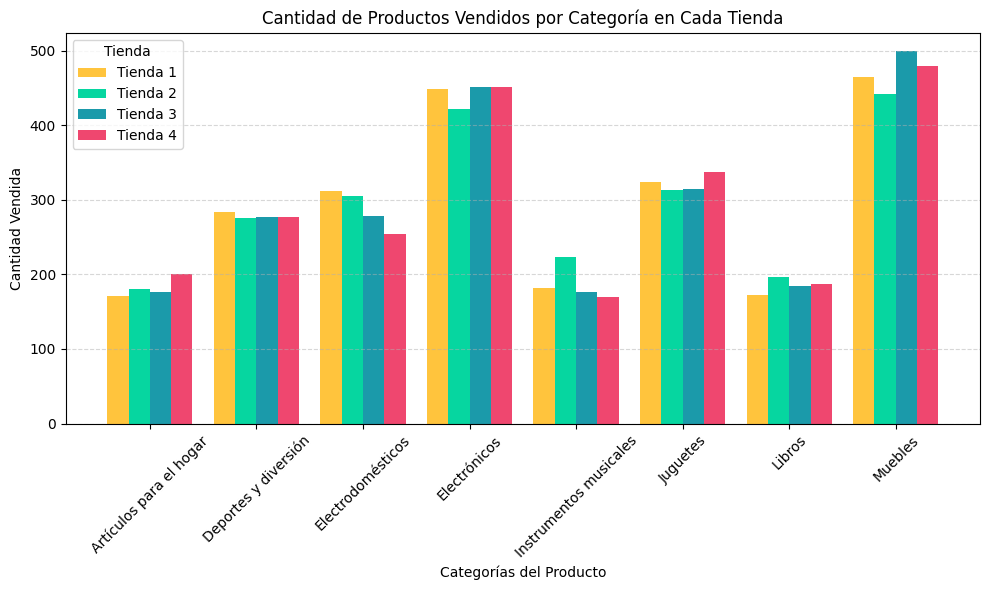

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores
colores_paleta = ["#ffc43d","#06d6a0","#1b9aaa","#ef476f","#f8ffe5"]

# Tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# Lista de categor√≠as (esto lo tienes de tu DataFrame)
categorias = pivot.index
# N√∫mero de categor√≠as
n = len(categorias)
# Ancho de las barras
bar_width = 0.2

# Posiciones de las barras en el eje X
posiciones = np.arange(n)

# Lista de tiendas
tiendas = pivot.columns

# Barras para cada tienda
for i, tienda in enumerate(tiendas):
    # Usamos la paleta para asignar colores diferentes a cada tienda
    color = colores_paleta[i % len(colores_paleta)]  # Usa el color correspondiente seg√∫n el √≠ndice de la tienda
    plt.bar(posiciones + i * bar_width, pivot[tienda], width=bar_width, label=tienda, color=color)

# Etiquetas en el eje X y otras configuraciones
plt.xticks(posiciones + bar_width * (len(tiendas) - 1) / 2, categorias, rotation=45)
plt.xlabel("Categor√≠as del Producto")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad de Productos Vendidos por Categor√≠a en Cada Tienda")
plt.legend(title="Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


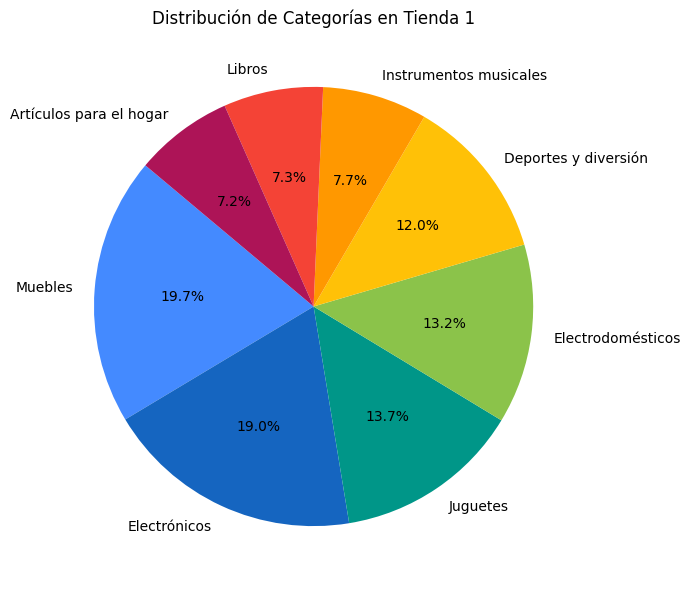

In [ ]:
import matplotlib.pyplot as plt

# Definir la paleta de colores
colores_paleta = ["#448aff", "#1565c0", "#009688", "#8bc34a", "#ffc107", "#ff9800", "#f44336", "#ad1457"]

# Filtrar los datos para Tienda 1 (aseg√∫rate de que df_total est√© definido)
tienda1_cat = df_total[df_total["Tienda"] == "Tienda 1"]["Categor√≠a del Producto"].value_counts()

# Crear el gr√°fico de pastel
plt.figure(figsize=(7, 7))
plt.pie(tienda1_cat, labels=tienda1_cat.index, autopct="%1.1f%%", startangle=140, colors=colores_paleta)

# T√≠tulo
plt.title("Distribuci√≥n de Categor√≠as en Tienda 1")

# Mejorar el layout
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


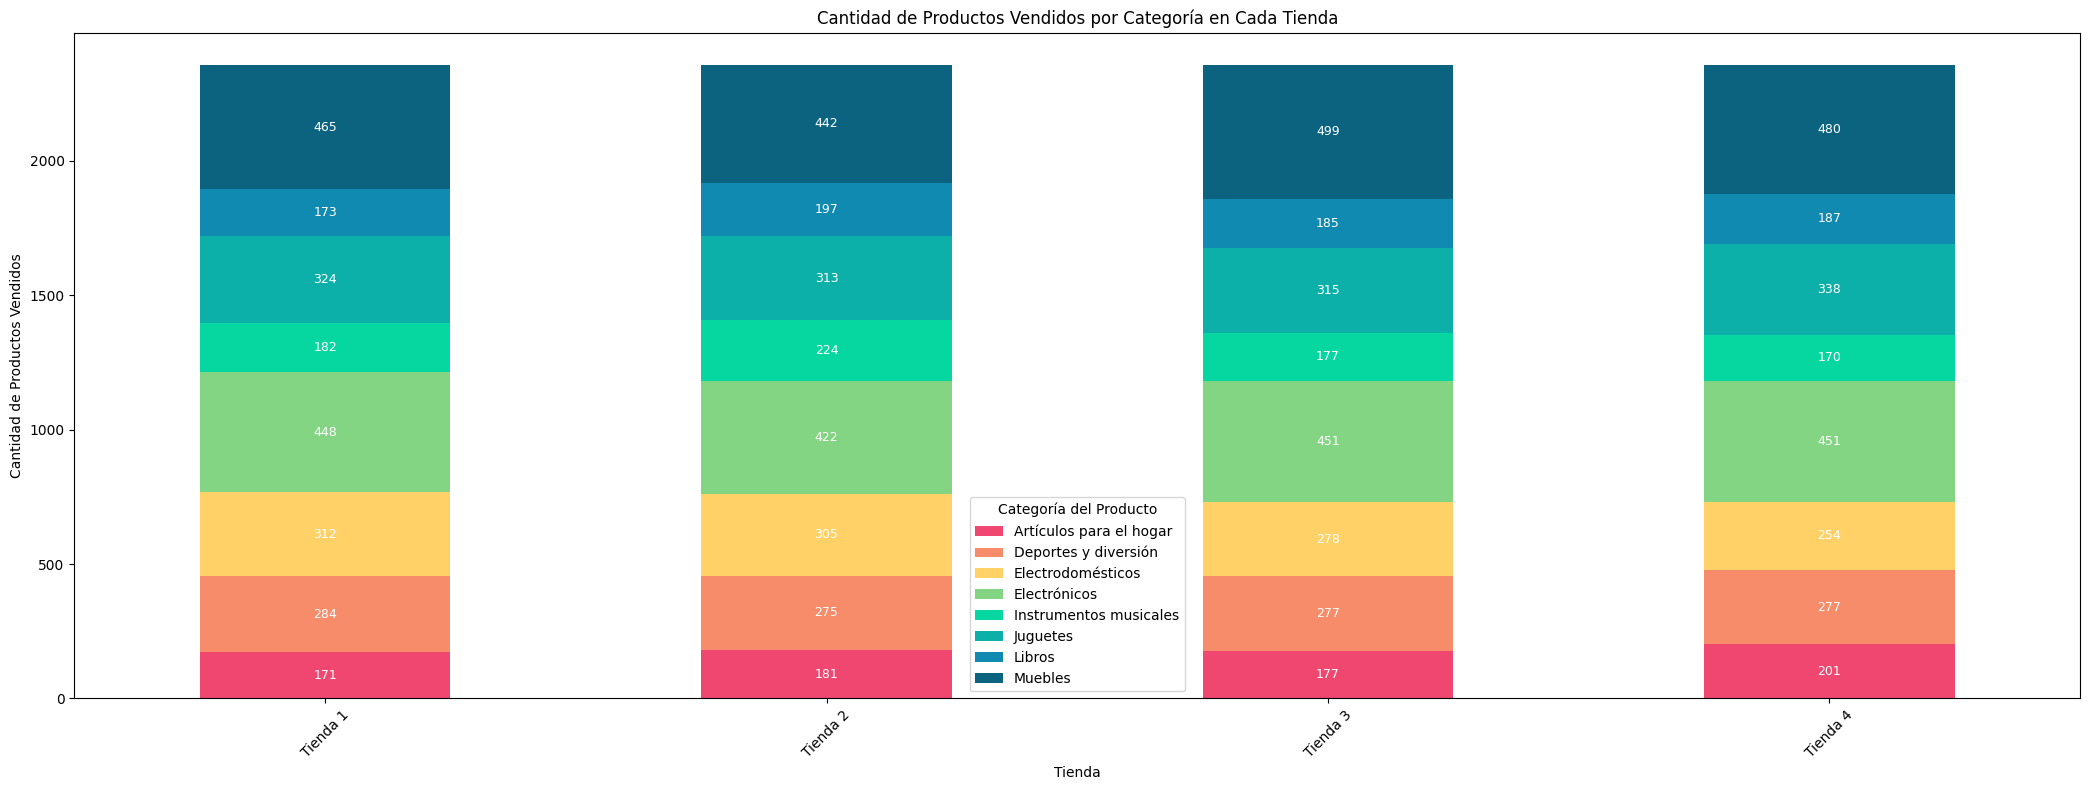

In [ ]:
import matplotlib.pyplot as plt

# Paleta de colores personalizada
colores_paleta = ["#ef476f","#f78c6b","#ffd166","#83d483","#06d6a0","#0cb0a9","#118ab2","#0c637f","#073b4c"]

# Calcular la cantidad de productos vendidos por categor√≠a por tienda
ventas_por_categoria = df_total.groupby(['Tienda', 'Categor√≠a del Producto'])['Producto'].count().unstack().fillna(0)

# Crear gr√°fico de barras apiladas con la paleta personalizada
ax = ventas_por_categoria.plot(kind='bar', stacked=True, figsize=(21, 8), color=colores_paleta[:len(ventas_por_categoria.columns)])

# T√≠tulos y etiquetas
plt.title("Cantidad de Productos Vendidos por Categor√≠a en Cada Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xticks(rotation=45)

# Etiquetas en las barras
for i, tienda in enumerate(ventas_por_categoria.index):
    # Variable para mantener la altura acumulada
    height = 0
    for j, categoria in enumerate(ventas_por_categoria.columns):
        # Obtener la altura de cada segmento
        valor = ventas_por_categoria.loc[tienda, categoria]
        height += valor
        # Colocar la etiqueta sobre la barra
        if valor > 0:  # Solo colocar etiquetas si hay valor
            ax.text(i, height - valor / 2, str(int(valor)), ha='center', va='center', fontsize=9, color='white')


# Ajustar el layout para que no se corten los elementos
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [ ]:
df_total["Calificaci√≥n"].describe()


count    9435.000000
mean        4.014520
std         1.390518
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Calificaci√≥n, dtype: float64

In [ ]:
calificaciones_promedio = df_total.groupby("Tienda")["Calificaci√≥n"].mean().reset_index()
calificaciones_promedio.columns = ["Tienda", "Calificaci√≥n Promedio"]
calificaciones_promedio



Tienda  Calificaci√≥n Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759

In [ ]:
calificaciones_promedio.sort_values("Calificaci√≥n Promedio", ascending=False)


Tienda  Calificaci√≥n Promedio
2  Tienda 3               4.048326
1  Tienda 2               4.037304
3  Tienda 4               3.995759
0  Tienda 1               3.976685

Tiendas con calificaciones m√°s cercanas a 5 est√°n generando mayor satisfacci√≥n del cliente.

### Comprobaci√≥n

In [ ]:
promedio_manual = df_total[df_total["Tienda"] == "Tienda 1"]["Calificaci√≥n"].mean()
print(promedio_manual)


3.976685036032217


### Visualizaci√≥n

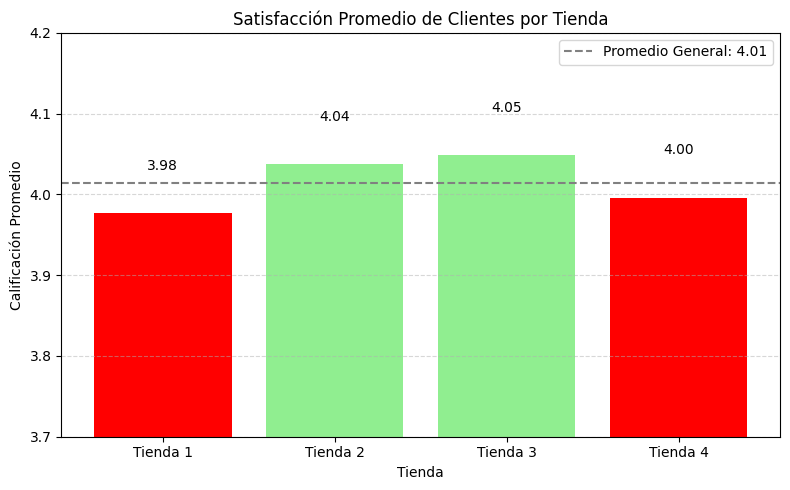

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(calificaciones_promedio["Tienda"], calificaciones_promedio["Calificaci√≥n Promedio"], color="mediumseagreen")

plt.title("Satisfacci√≥n Promedio de Clientes por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificaci√≥n Promedio")
plt.ylim(3.7, 4.2) # Escala de calificaciones de 0 a 5
plt.grid(axis="y", linestyle="--", alpha=0.5)
colors = ['red' if val < 4 else 'lightgreen' for val in calificaciones_promedio["Calificaci√≥n Promedio"]]
plt.bar(calificaciones_promedio["Tienda"], calificaciones_promedio["Calificaci√≥n Promedio"], color=colors)
promedio_global = df_total["Calificaci√≥n"].mean()
plt.axhline(promedio_global, color='gray', linestyle='--', label=f'Promedio General: {promedio_global:.2f}')
plt.legend()

# Etiquetas sobre las barras
for i, valor in enumerate(calificaciones_promedio["Calificaci√≥n Promedio"]):
  plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

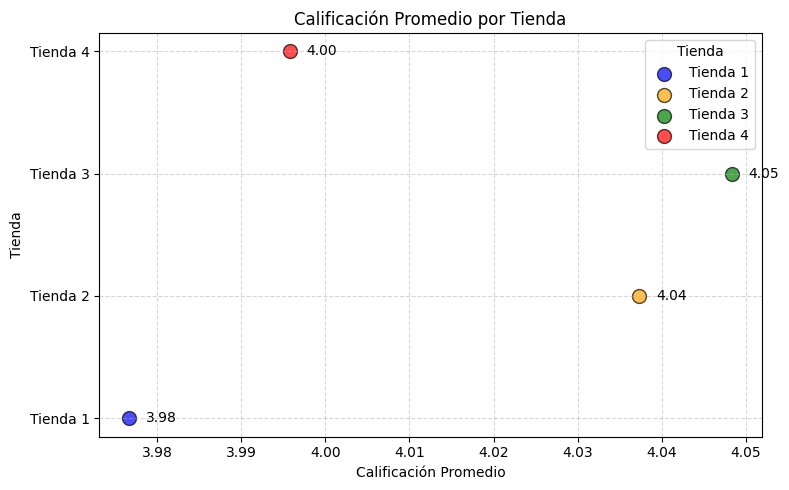

In [ ]:
import matplotlib.pyplot as plt

# Ordenar las calificaciones por tienda
calif_orden = calificaciones_promedio.sort_values("Tienda")

# Crear el gr√°fico
plt.figure(figsize=(8, 5))

# Colores personalizados para cada tienda
colores = ['blue', 'orange', 'green', 'red']

# Graficar los puntos para cada tienda
for i, tienda in enumerate(calif_orden["Tienda"].unique()):
    tienda_data = calif_orden[calif_orden["Tienda"] == tienda]
    plt.scatter(tienda_data["Calificaci√≥n Promedio"], [tienda] * len(tienda_data),
                color=colores[i], label=tienda, s=100, edgecolor='black', alpha=0.7)

# T√≠tulos y etiquetas
plt.title("Calificaci√≥n Promedio por Tienda")
plt.xlabel("Calificaci√≥n Promedio")
plt.ylabel("Tienda")

# Configuraci√≥n de la cuadr√≠cula
plt.grid(True, linestyle="--", alpha=0.5)

# A√±adir leyenda
plt.legend(title="Tienda")

# A√±adir etiquetas para las calificaciones con desplazamiento
for i, tienda in enumerate(calif_orden["Tienda"].unique()):
    tienda_data = calif_orden[calif_orden["Tienda"] == tienda]
    for j, valor in enumerate(tienda_data["Calificaci√≥n Promedio"]):
        # Desplazar las etiquetas para evitar empalmes
        offset = 0.002  # Este valor puede ser ajustado para separar m√°s o menos las etiquetas
        plt.text(valor + offset, tienda, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='black')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


# 4. Productos m√°s y menos vendidos



In [ ]:
producto_por_tienda = df_total.groupby(["Tienda", "Producto", "Categor√≠a del Producto"]).size().reset_index(name="Cantidad Vendida")


In [ ]:
# Obtener el valor m√°ximo de ventas por tienda
max_por_tienda = producto_por_tienda.groupby("Tienda")["Cantidad Vendida"].transform("max")

# Filtrar los productos que tienen ese valor m√°ximo
mas_vendidos = producto_por_tienda[producto_por_tienda["Cantidad Vendida"] == max_por_tienda].copy()


# Menos vendidos por tienda
min_por_tienda = producto_por_tienda.groupby("Tienda")["Cantidad Vendida"].transform("min")
menos_vendidos = producto_por_tienda[producto_por_tienda["Cantidad Vendida"] == min_por_tienda].copy()


print("‚úÖ Productos m√°s vendidos por tienda:")
print(mas_vendidos)


print("\nüîª Productos menos vendidos por tienda:")
print(menos_vendidos)

‚úÖ Productos m√°s vendidos por tienda:
       Tienda                   Producto Categor√≠a del Producto  \
1    Tienda 1                    Armario                Muebles   
33   Tienda 1                 Microondas      Electrodom√©sticos   
48   Tienda 1              TV LED UHD 4K           Electr√≥nicos   
75   Tienda 2  Iniciando en programaci√≥n                 Libros   
129  Tienda 3              Kit de bancas                Muebles   
163  Tienda 4                   Cama box                Muebles   

     Cantidad Vendida  
1                  60  
33                 60  
48                 60  
75                 65  
129                57  
163                62  

üîª Productos menos vendidos por tienda:
       Tienda                   Producto  Categor√≠a del Producto  \
4    Tienda 1  Auriculares con micr√≥fono            Electr√≥nicos   
13   Tienda 1               Celular ABXY            Electr√≥nicos   
77   Tienda 2              Juego de mesa                Juguetes   

### Comprobaci√≥n

In [ ]:
producto = "Armario"
tienda = "Tienda 1"

cantidad = df_total[(df_total["Tienda"] == tienda) & (df_total["Producto"] == producto)].shape[0]
print(cantidad)


60


# Visualizaci√≥n



üìä Top 10 productos m√°s vendidos en Tienda 1:


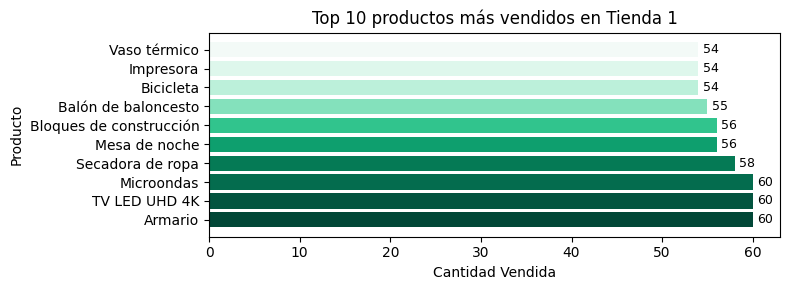


üìâ Top 10 productos menos vendidos en Tienda 1:


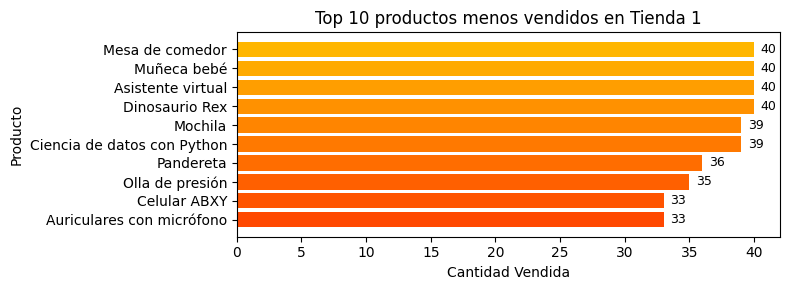


üìä Top 10 productos m√°s vendidos en Tienda 2:


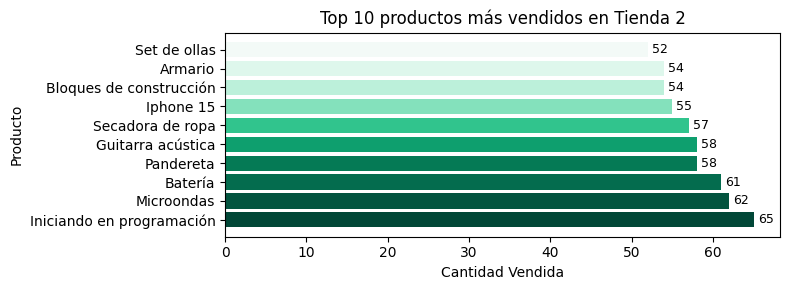


üìâ Top 10 productos menos vendidos en Tienda 2:


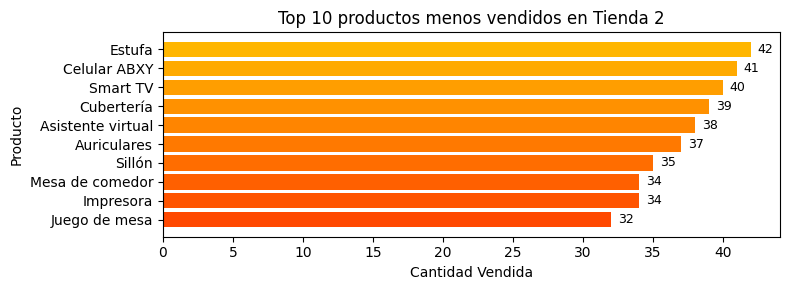


üìä Top 10 productos m√°s vendidos en Tienda 3:


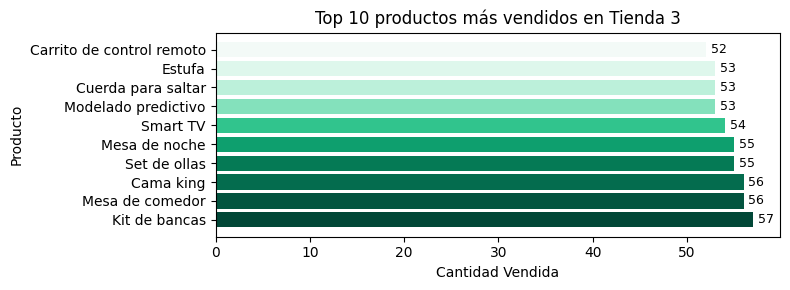


üìâ Top 10 productos menos vendidos en Tienda 3:


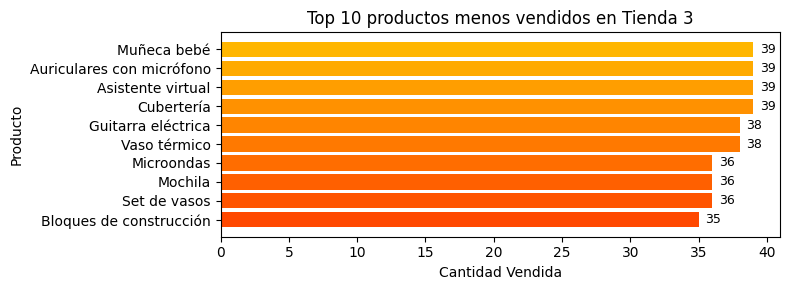


üìä Top 10 productos m√°s vendidos en Tienda 4:


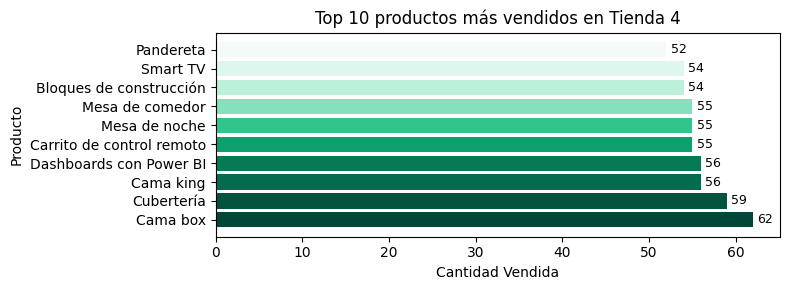


üìâ Top 10 productos menos vendidos en Tienda 4:


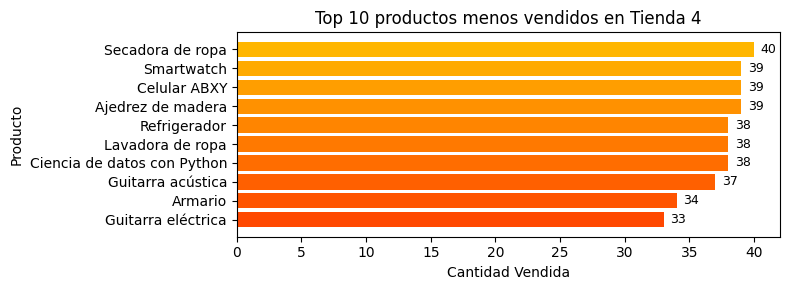

In [ ]:
import matplotlib.pyplot as plt

def prods_tienda(df, nombre_tienda, n=8, top=True, mostrar_valores=True):
    """
    Grafica los productos m√°s o menos vendidos por tienda.

    Par√°metros:
    - df: DataFrame que contiene las columnas 'Tienda', 'Producto' y 'Cantidad Vendida'
    - nombre_tienda: nombre exacto de la tienda
    - n: n√∫mero de productos a mostrar (por defecto 8)
    - top: True para m√°s vendidos, False para menos vendidos
    - mostrar_valores: muestra la cantidad al final de cada barra
    """
    # Filtrar por tienda y ordenar
    datos_tienda = df[df["Tienda"] == nombre_tienda].copy()
    datos_tienda = datos_tienda.sort_values("Cantidad Vendida", ascending=not top).head(n)

    tipo = "m√°s" if top else "menos"

    # Crear gr√°fico
    plt.figure(figsize=(8, 3))

    # Paletas de colores para los productos m√°s y menos vendidos
    colores_mas_vendidos = ["#014737","#03543f","#046c4e","#057a55","#0e9f6e","#31c48d","#84e1bc","#bcf0da","#def7ec","#f3faf7"]
    colores_menos_vendidos = ["#ff4800", "#ff5400", "#ff6000", "#ff6d00", "#ff7900", "#ff8500", "#ff9100", "#ff9e00", "#ffaa00", "#ffb600"]

    # Seleccionar la paleta correspondiente seg√∫n 'top'
    colores = colores_mas_vendidos[:n] if top else colores_menos_vendidos[:n]

    # Crear gr√°fico de barras horizontales con los colores personalizados
    bars = plt.barh(datos_tienda["Producto"], datos_tienda["Cantidad Vendida"], color=colores)
    plt.title(f"Top {n} productos {tipo} vendidos en {nombre_tienda}")
    plt.xlabel("Cantidad Vendida")
    plt.ylabel("Producto")
    plt.tight_layout()

    # Agregar etiquetas al final de cada barra
    if mostrar_valores:
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.5,  # posici√≥n horizontal (ligeramente despu√©s de la barra)
                     bar.get_y() + bar.get_height() / 2,  # centro vertical
                     f'{int(width)}',  # el n√∫mero
                     va='center', fontsize=9, color='black')

    plt.show()

# Calcular cantidad vendida por producto y tienda (si no est√° hecho)
producto_por_tienda = df_total.groupby(["Tienda", "Producto", "Categor√≠a del Producto"]).size().reset_index(name="Cantidad Vendida")

# Listado de tiendas
tiendas = df_total["Tienda"].unique()

# N√∫mero de productos a mostrar
n = 10

# Generar gr√°ficos para cada tienda
for tienda in tiendas:
    print(f"\nüìä Top {n} productos m√°s vendidos en {tienda}:")
    prods_tienda(producto_por_tienda, tienda, n=n, top=True)

    print(f"\nüìâ Top {n} productos menos vendidos en {tienda}:")
    prods_tienda(producto_por_tienda, tienda, n=n, top=False)


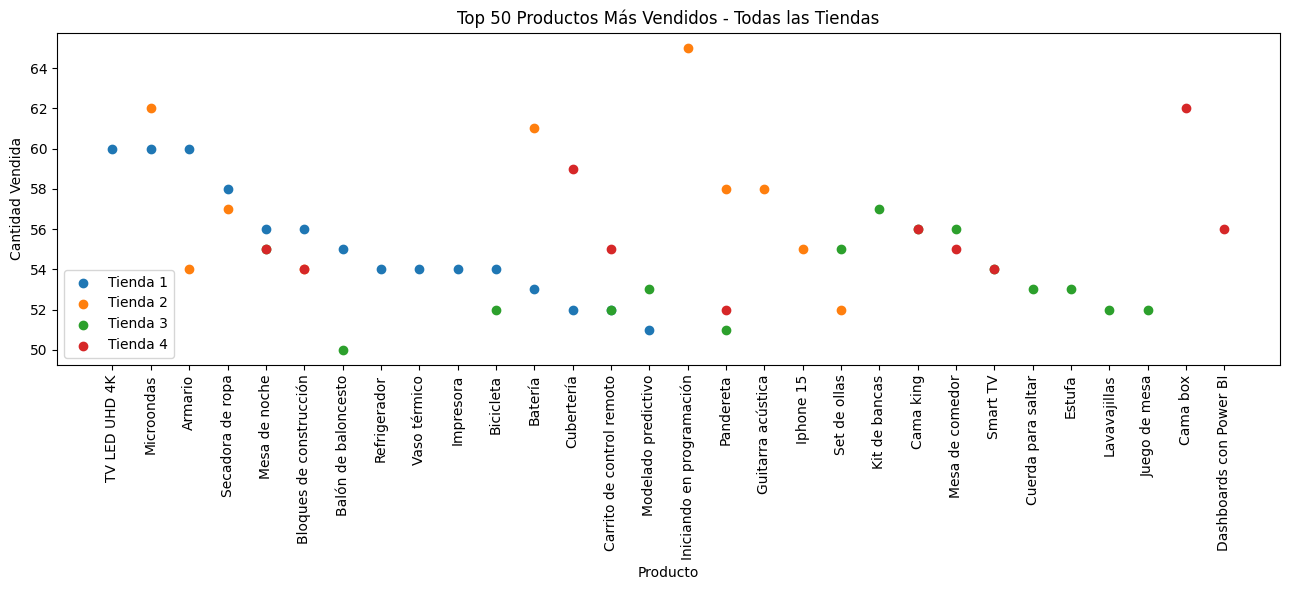

In [ ]:
# Scatter plot de productos m√°s vendidos (top 50)
top_productos = producto_por_tienda.sort_values("Cantidad Vendida", ascending=False).head(50)

plt.figure(figsize=(13, 6))
for tienda in tiendas:
    subset = top_productos[top_productos["Tienda"] == tienda]
    plt.scatter(subset["Producto"], subset["Cantidad Vendida"], label=tienda)

plt.xticks(rotation=90)
plt.title("Top 50 Productos M√°s Vendidos - Todas las Tiendas")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.legend()
plt.tight_layout()
plt.show()


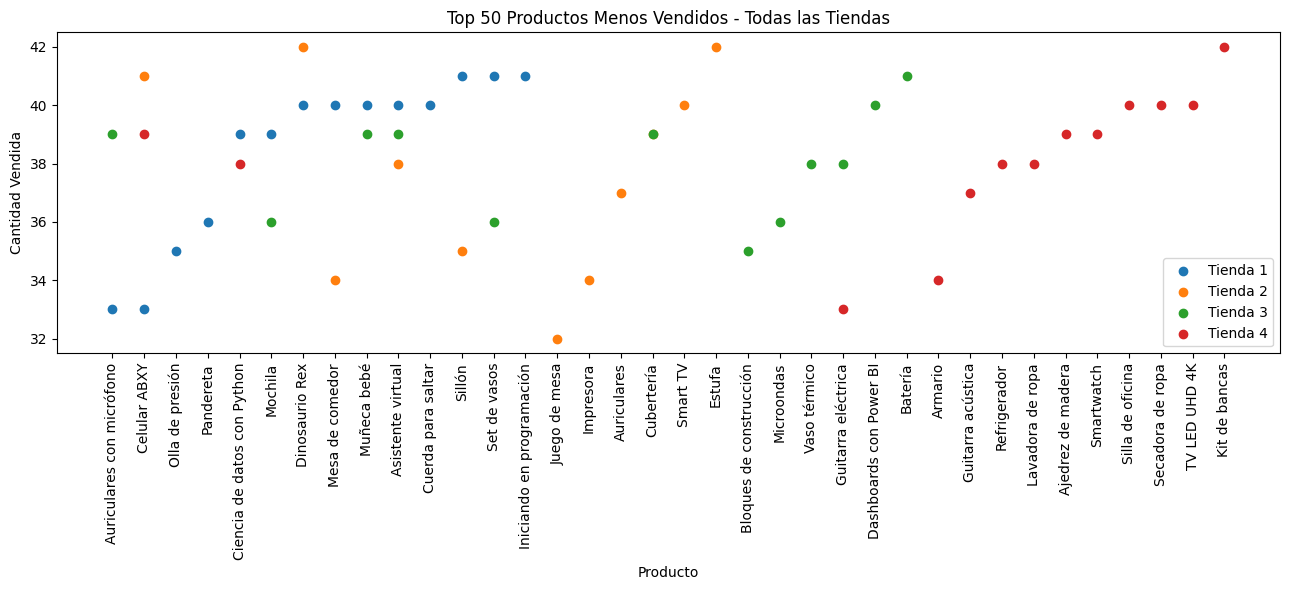

In [ ]:
# Scatter plot de productos m√°s vendidos (top 50)
top_productos = producto_por_tienda.sort_values("Cantidad Vendida", ascending=True).head(50)

plt.figure(figsize=(13, 6))
for tienda in tiendas:
    subset = top_productos[top_productos["Tienda"] == tienda]
    plt.scatter(subset["Producto"], subset["Cantidad Vendida"], label=tienda)

plt.xticks(rotation=90)
plt.title("Top 50 Productos Menos Vendidos - Todas las Tiendas")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.legend()
plt.tight_layout()
plt.show()

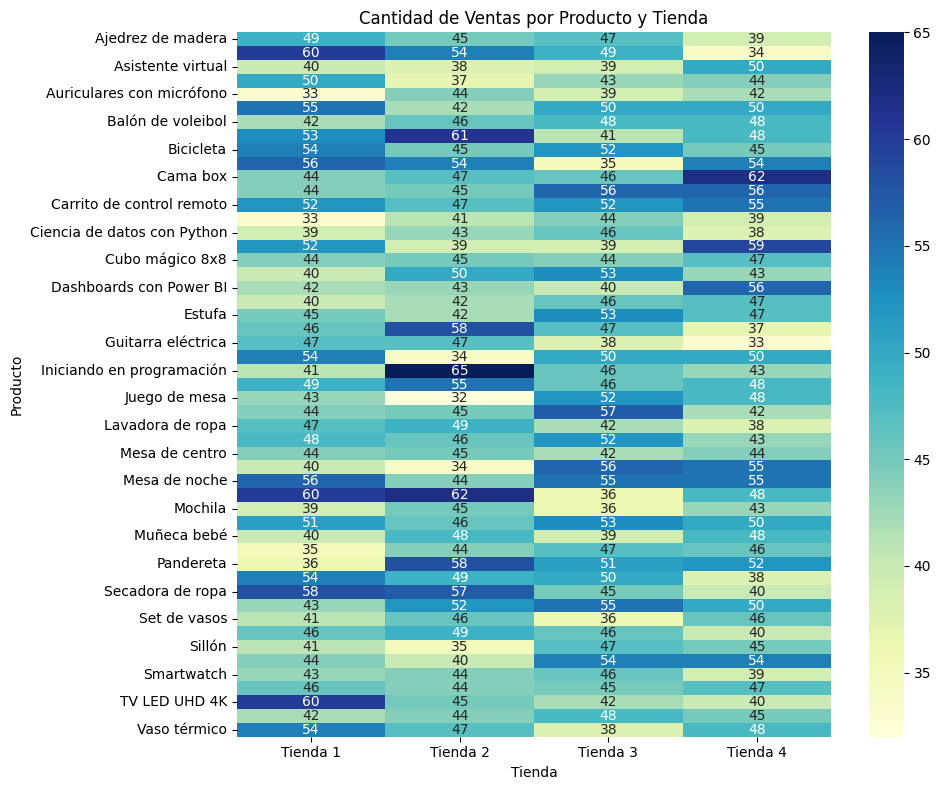

In [ ]:
import seaborn as sns  # Requiere instalaci√≥n: pip install seaborn

# Crear tabla din√°mica de ventas por producto y tienda
tabla = df_total.pivot_table(index="Producto", columns="Tienda", values="Precio", aggfunc="count").fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Cantidad de Ventas por Producto y Tienda")
plt.xlabel("Tienda")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


# 5. Env√≠o promedio por tienda

     Tienda  Costo de Env√≠o Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


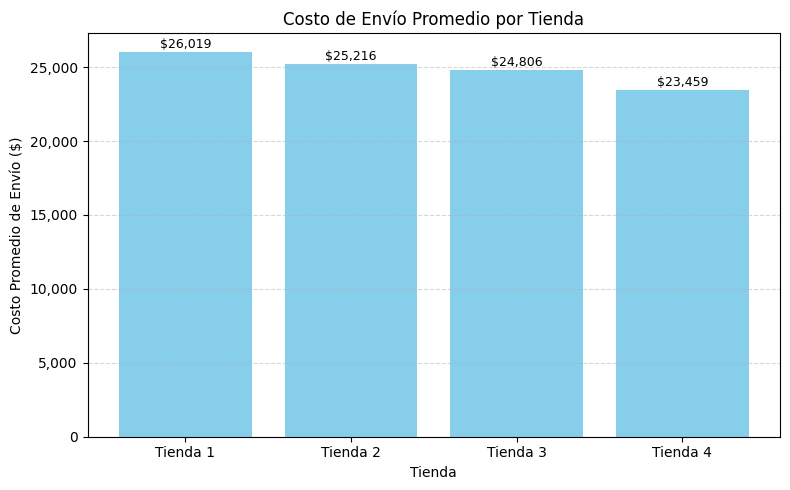

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. Agrupar por tienda y calcular el costo promedio de env√≠o
costo_envio_promedio = df_total.groupby("Tienda")["Costo de env√≠o"].mean().reset_index()
costo_envio_promedio.columns = ["Tienda", "Costo de Env√≠o Promedio"]

# Mostrar la tabla de resultados
print(costo_envio_promedio)

# 2. Graficar los costos promedio de env√≠o
plt.figure(figsize=(8, 5))
plt.bar(costo_envio_promedio["Tienda"], costo_envio_promedio["Costo de Env√≠o Promedio"], color="skyblue")

plt.title("Costo de Env√≠o Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Env√≠o ($)")

# Formatear el eje Y con separadores de miles
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis="y", linestyle="--", alpha=0.5)

# Agregar etiquetas sobre las barras
for i, valor in enumerate(costo_envio_promedio["Costo de Env√≠o Promedio"]):
    plt.text(i, valor + 50, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Visualizaci√≥n

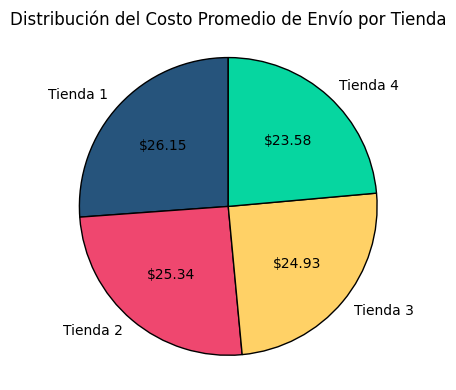

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por tienda y calcular el costo promedio de env√≠o
costo_envio_promedio = df_total.groupby("Tienda")["Costo de env√≠o"].mean().reset_index()
costo_envio_promedio.columns = ["Tienda", "Costo de Env√≠o Promedio"]

# 2. Graficar un gr√°fico de torta para el costo de env√≠o promedio por tienda
plt.figure(figsize=(4, 4))

# Definir la paleta de colores personalizada
colores_personalizados = ["#26547c", "#ef476f", "#ffd166", "#06d6a0"]

plt.pie(costo_envio_promedio["Costo de Env√≠o Promedio"],
        labels=costo_envio_promedio["Tienda"],
        autopct=lambda x: f"${x:,.2f}",  # Mostrar el valor en d√≥lares con separadores de miles
        colors=colores_personalizados,  # Usar la paleta personalizada
        startangle=90,  # Iniciar el gr√°fico en 90 grados
        wedgeprops={'edgecolor': 'black'})  # Borde de las porciones

plt.title("Distribuci√≥n del Costo Promedio de Env√≠o por Tienda")
plt.axis('equal')  # Asegura que el gr√°fico sea circular

plt.tight_layout()
plt.show()



### Comrpobaci√≥n

In [ ]:
tienda1 = df_total[df_total["Tienda"] == "Tienda 4"]

suma = tienda1["Costo de env√≠o"].sum()
cantidad = tienda1["Costo de env√≠o"].count()

promedio = suma / cantidad
print(f"Suma: {suma}, Cantidad: {cantidad}, Promedio: {promedio}")


Suma: 55317400.0, Cantidad: 2358, Promedio: 23459.457167090754


# 6. Extra. An√°lisis del desempe√±o geogr√°fico

In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un mapa base centrado en el promedio de las latitudes y longitudes
m = folium.Map(location=[df_total['lat'].mean(), df_total['lon'].mean()], zoom_start=6)

# Preparar los datos para el mapa de calor
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_total.iterrows()]

# Agregar el mapa de calor
HeatMap(heat_data).add_to(m)

# Mostrar el mapa interactivo
m


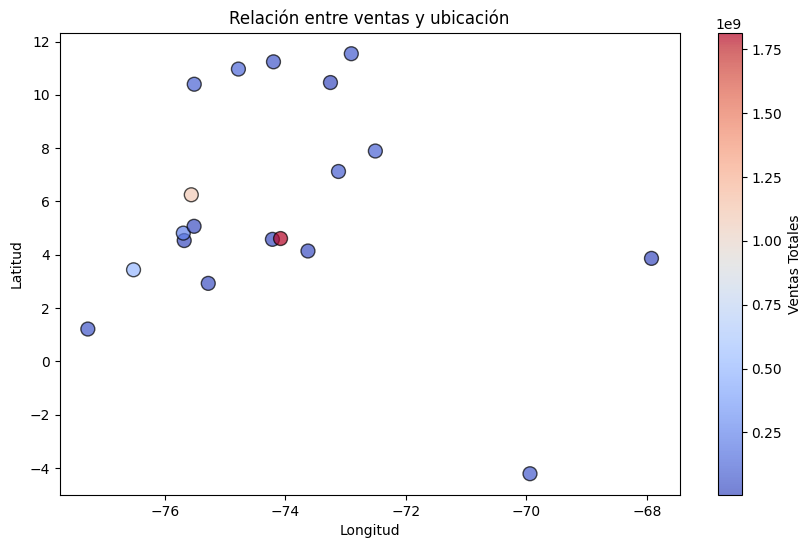

In [ ]:
# Agrupar por latitud y longitud, y calcular la suma de ventas y la media de las calificaciones
df_agg = df_total.groupby(['lat', 'lon']).agg({'Precio': 'sum', 'Calificaci√≥n': 'mean'}).reset_index()

# Crear un gr√°fico de dispersi√≥n para ver la relaci√≥n entre las ventas y las calificaciones en funci√≥n de la ubicaci√≥n
plt.figure(figsize=(10, 6))
plt.scatter(df_agg['lon'], df_agg['lat'], c=df_agg['Precio'], cmap='coolwarm', alpha=0.7, edgecolors='k', s=100)
plt.colorbar(label='Ventas Totales')
plt.title('Relaci√≥n entre ventas y ubicaci√≥n')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [ ]:
# Agrupar por Tienda y Lugar de Compra para calcular la suma de ventas y la media de las calificaciones
df_ventas_ubicacion = df_total.groupby(['Tienda', 'Lugar de Compra']).agg({'Precio': 'sum', 'Calificaci√≥n': 'mean'}).reset_index()

# Mostrar el rendimiento por tienda y ubicaci√≥n
df_ventas_ubicacion



Tienda Lugar de Compra       Precio  Calificaci√≥n
0   Tienda 1         Armenia    4615700.0      3.357143
1   Tienda 1    Barranquilla   32907700.0      3.573333
2   Tienda 1          Bogot√°  440005000.0      4.089431
3   Tienda 1     Bucaramanga   17579200.0      4.387097
4   Tienda 1            Cali  154493700.0      3.985866
..       ...             ...          ...           ...
71  Tienda 4        Riohacha   23684700.0      4.113636
72  Tienda 4     Santa Marta   13218600.0      3.542857
73  Tienda 4          Soacha    3149000.0      4.500000
74  Tienda 4      Valledupar    1057000.0      5.000000
75  Tienda 4   Villavicencio    1586600.0      3.285714

[76 rows x 4 columns]

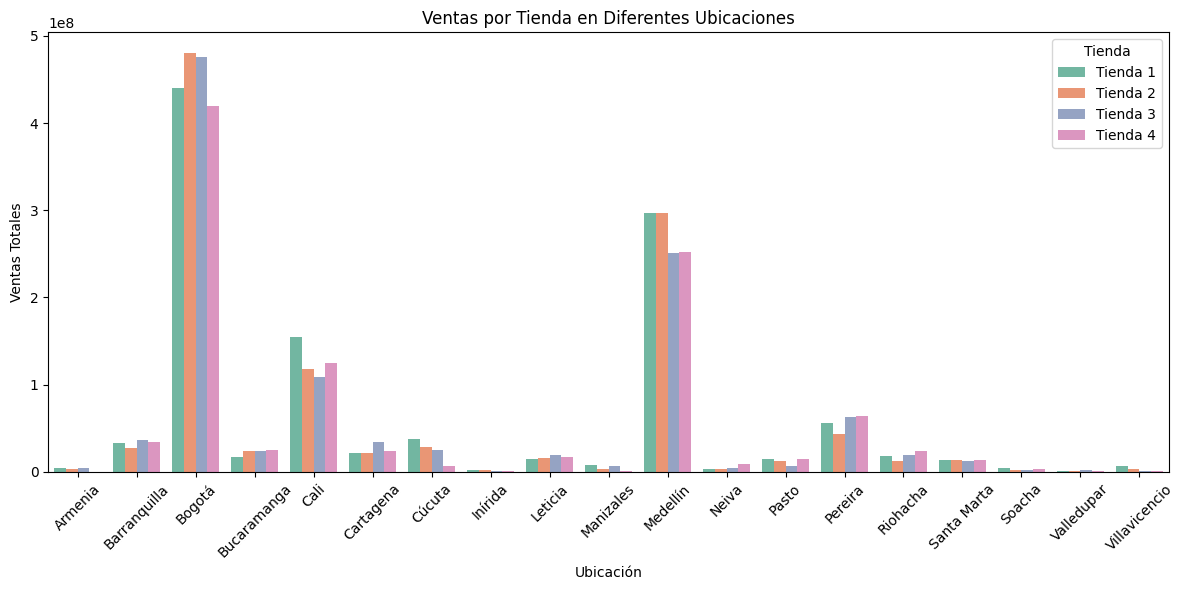

In [ ]:
import seaborn as sns

# Crear un gr√°fico de barras para mostrar las ventas por Tienda y Lugar de Compra
plt.figure(figsize=(12, 6))
sns.barplot(x='Lugar de Compra', y='Precio', hue='Tienda', data=df_ventas_ubicacion, palette='Set2')

plt.title('Ventas por Tienda en Diferentes Ubicaciones')
plt.xlabel('Ubicaci√≥n')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Informe de An√°lisis y Recomendaci√≥n para Alura Store

### **Introducci√≥n**

El presente informe tiene como objetivo analizar el rendimiento integral de las cuatro sucursales de la cadena Alura Store. A trav√©s de la evaluaci√≥n de m√©tricas clave como ingresos totales, ventas por categor√≠a, calificaciones de clientes, rendimiento de productos y costos de env√≠o, se busca identificar la tienda con el desempe√±o menos eficiente. El an√°lisis culminar√° en una recomendaci√≥n estrat√©gica para el Sr. Juan sobre qu√© sucursal vender para liberar capital y as√≠ poder iniciar su nuevo emprendimiento.



### **Desarrollo del An√°lisis de Datos**

A continuaci√≥n, se presenta el an√°lisis de los datos extra√≠dos de los archivos CSV, procesados con la biblioteca Pandas y visualizados con Matplotlib.


#### **1. Ingresos Totales por Tienda**

Los ingresos son el indicador m√°s directo del rendimiento financiero de cada sucursal. La **Tienda 1** lidera con los ingresos m√°s altos, mientras que la **Tienda 4** se posiciona en el √∫ltimo lugar con una diferencia considerable respecto a las dem√°s.

- **Tienda 1:** $1,150,880,400
    
- **Tienda 2:** $1,116,343,500
    
- **Tienda 3:** $1,098,019,600
    
- **Tienda 4:** $1,038,375,700
    

**Gr√°fico - Ingresos Totales por Tienda:**

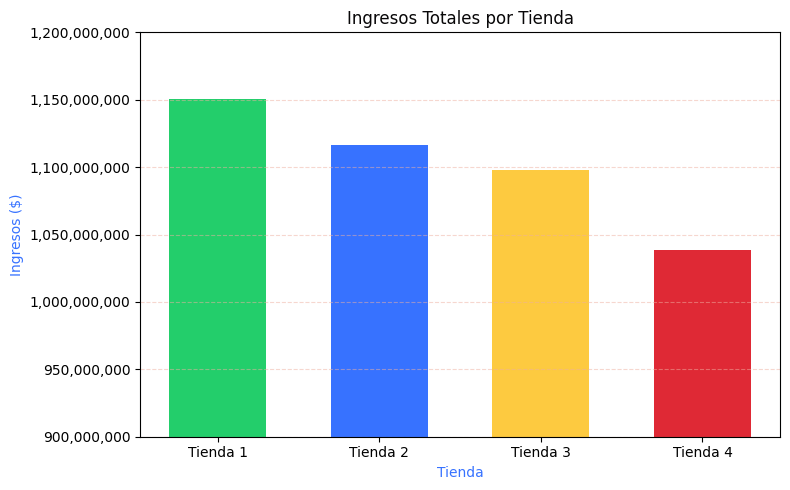

_Este gr√°fico visualiza de forma clara y comparativa la brecha de ingresos entre las tiendas, destacando el bajo rendimiento de la Tienda 4._

**Gr√°fico2 - Ingresos Totales por Tienda:**

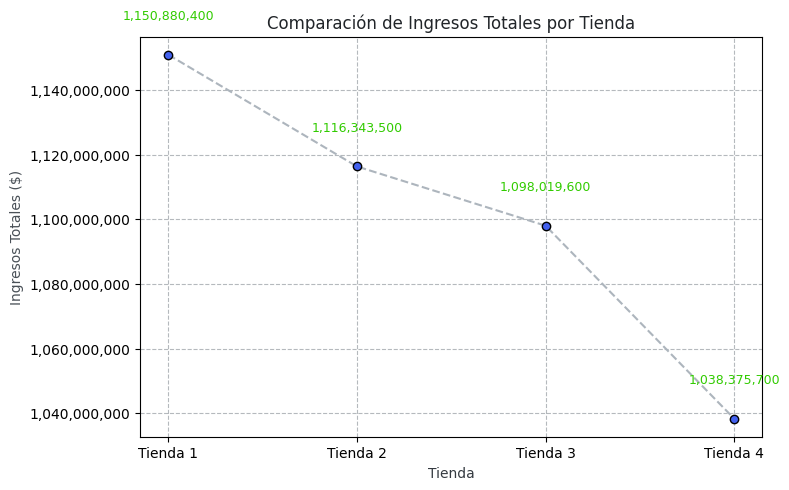

---


#### **2. Ventas por Categor√≠a de Producto**
El an√°lisis de las categor√≠as de productos m√°s vendidas revela las preferencias de los clientes en cada tienda. En todas las sucursales, **Muebles** y **Electr√≥nicos** son las categor√≠as m√°s populares, lo que indica una demanda de esos productos.

- **Categor√≠a m√°s vendida en todas las tiendas:** Muebles.
    
- **Rendimiento por categor√≠a:** La Tienda 4 muestra el rendimiento m√°s bajo en la venta de **Electrodom√©sticos** (254 unidades) en comparaci√≥n con las otras tiendas. Aunque vende m√°s **Juguetes** y **Art√≠culos para el hogar**, vender menos en una categor√≠a de alto valor como electrodom√©sticos es un punto d√©bil.  


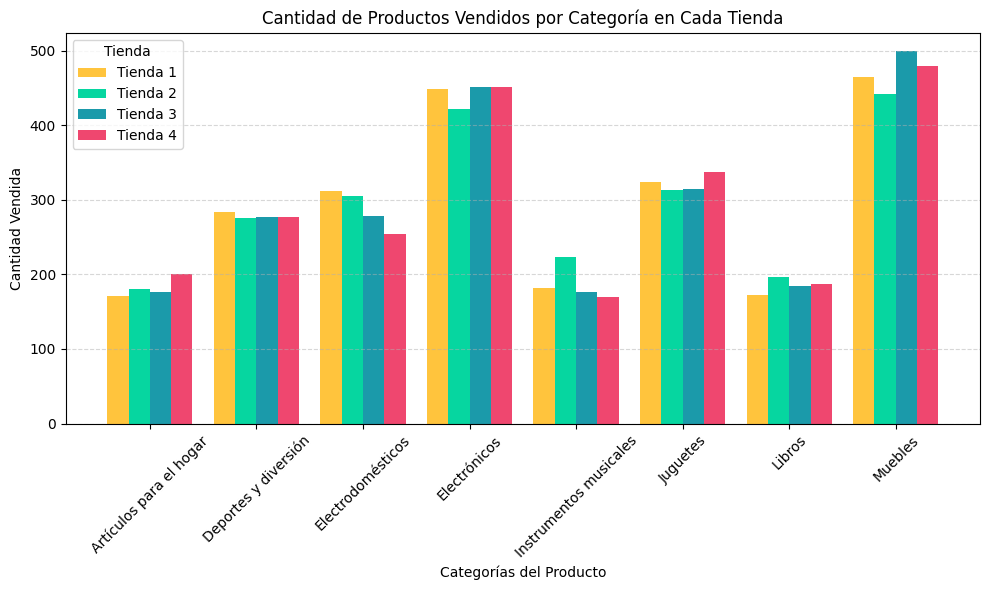


**Gr√°fico - Cantidad de Productos Vendidos por Categor√≠a en Cada Tienda :** _El gr√°fico de barras agrupadas y el de barras apiladas  son excelentes opciones. Permiten comparar el volumen de ventas de cada categor√≠a entre las cuatro tiendas, evidenciando las fortalezas y debilidades de cada una._  


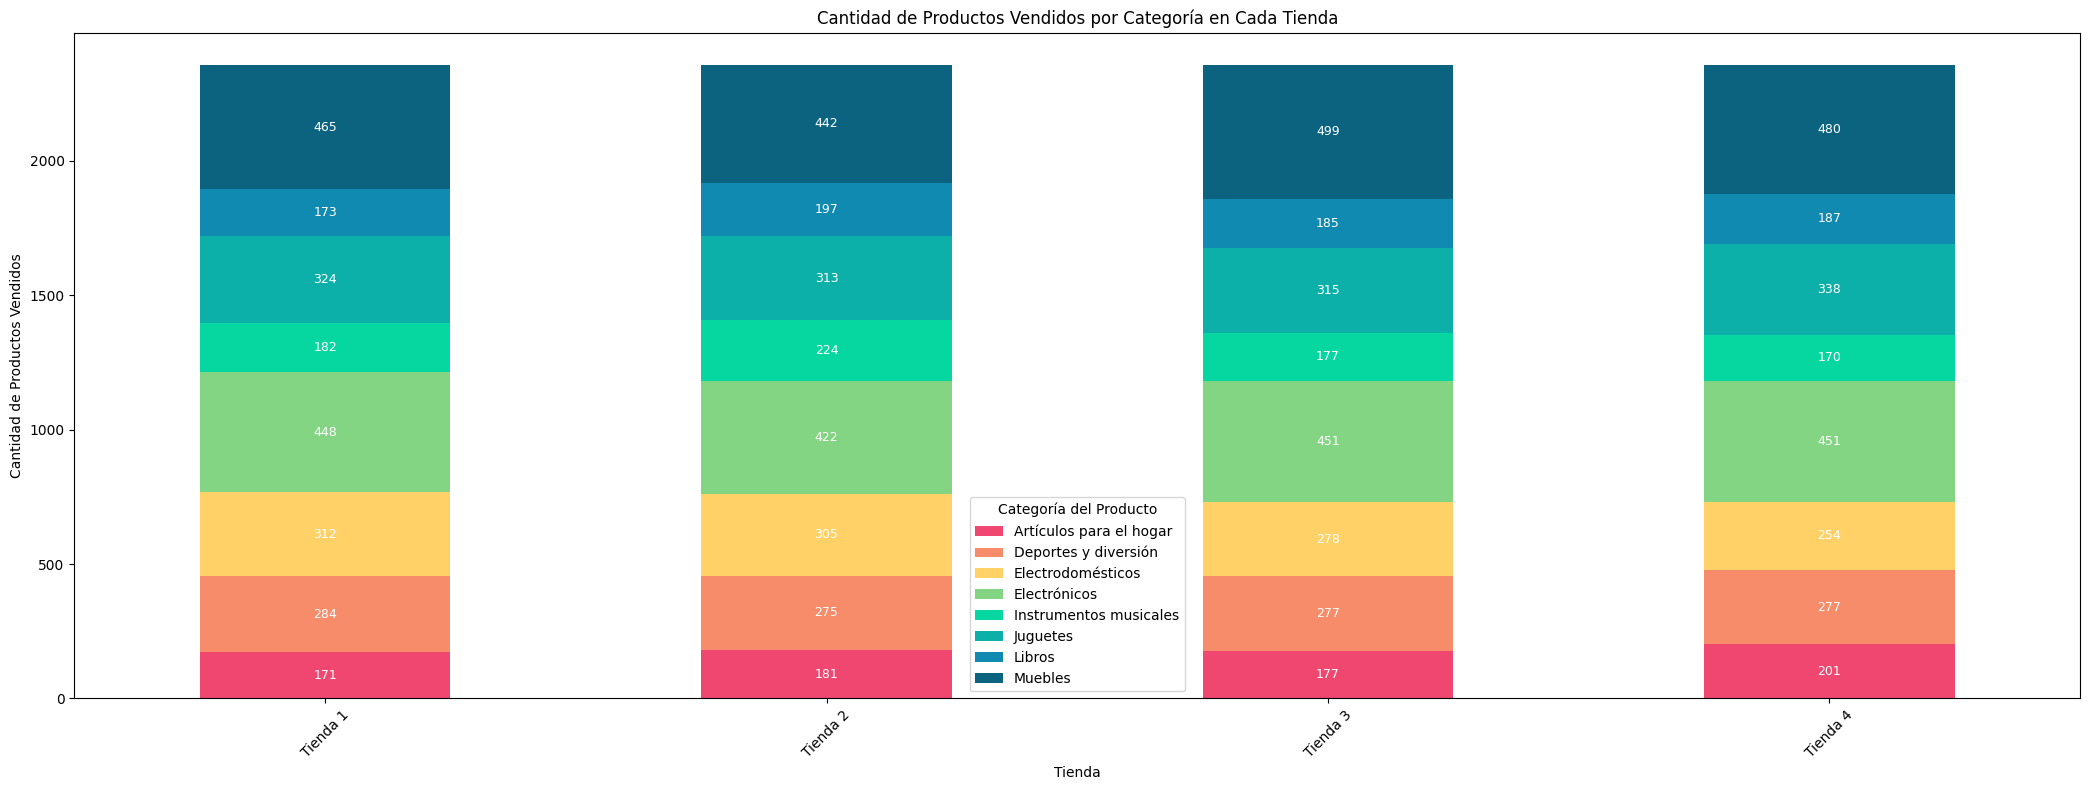


**Gr√°fico de Pastel (Ejemplo con Tienda 1)**

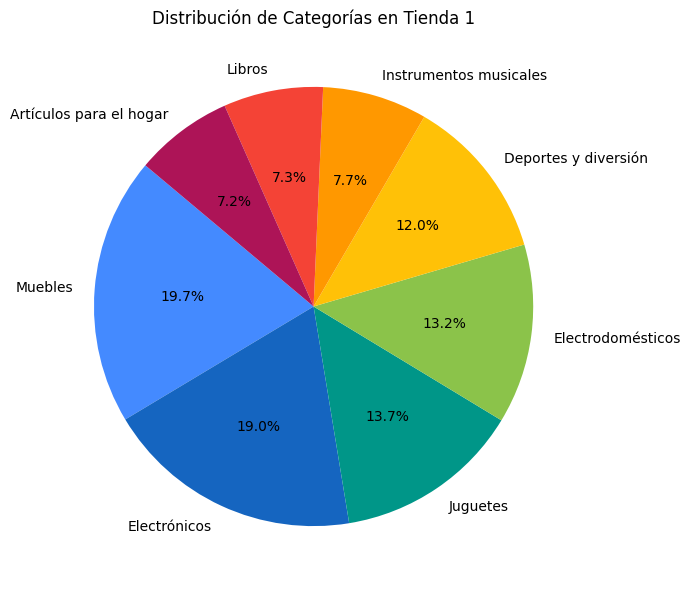
---

#### **3. Calificaci√≥n Promedio de los Clientes**

La satisfacci√≥n del cliente es crucial para la lealtad y el √©xito a largo plazo. Las **Tiendas 2 y 3** lideran con las calificaciones promedio m√°s altas, lo que sugiere una excelente experiencia del cliente. Por el contrario, la **Tienda 1** y la **Tienda 4** tienen las calificaciones m√°s bajas.

- **Tienda 2:** 4.04
    
- **Tienda 3:** 4.05
    
- **Tienda 1:** 3.98
    
- **Tienda 4:** 4.00
    

Aunque la diferencia es m√≠nima, una calificaci√≥n m√°s baja en la Tienda 4, combinada con sus menores ingresos, apunta a un rendimiento general inferior.

**Gr√°fico - Satisfacci√≥n Promedio de Clientes por Tienda** _El uso de colores para diferenciar las calificaciones (rojo para las m√°s bajas) y una l√≠nea de promedio general ayuda a contextualizar el rendimiento de cada tienda r√°pidamente._  


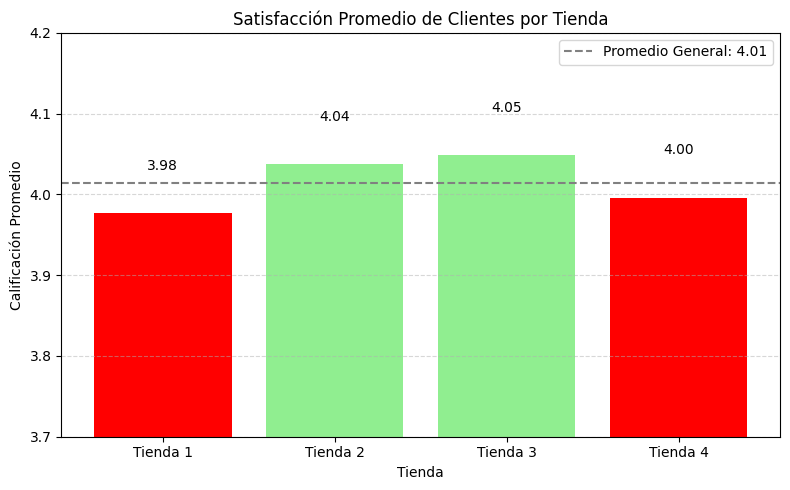

---

#### **4. Productos M√°s y Menos Vendidos**

Este an√°lisis revela qu√© art√≠culos espec√≠ficos impulsan las ventas y cu√°les no.

- **Productos m√°s vendidos:** Cada tienda tiene productos estrella que se venden bien. Por ejemplo, en la Tienda 2, "Iniciando en programaci√≥n" es un √©xito de ventas con 65 unidades, el m√°s alto entre los productos top. La Tienda 4 tiene un buen desempe√±o con "Cama box" (62 unidades).
    
- **Productos menos vendidos:** La Tienda 2 tiene el producto con la menor cantidad de ventas ("Juego de mesa" con 32 unidades). Sin embargo, esto es un dato aislado. En general, todas las tiendas tienen productos con ventas en un rango similar de 33-35 unidades.
    

Este indicador no se√±ala a una tienda como deficiente, pero s√≠ muestra que el √©xito de productos individuales var√≠a significativamente por sucursal.



**Gr√°ficos - Top 10 productos m√°s/menos vendidos:** _Los gr√°ficos de barras horizontales para cada tienda son muy efectivos. Presentan la informaci√≥n de manera clara y separada, permitiendo un an√°lisis detallado por sucursal._  

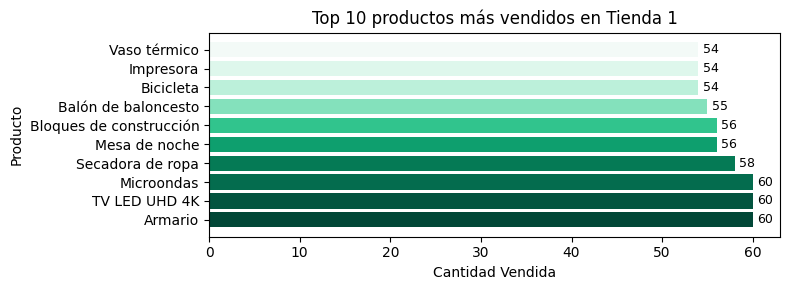


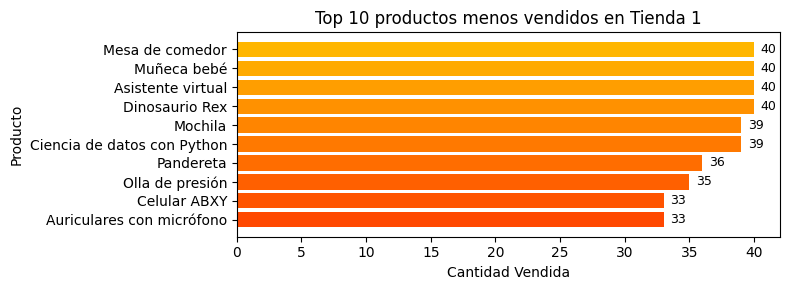


**Gr√°ficos - Top 50 productos m√°s/menos vendidos:** _Los gr√°ficos de distribuci√≥n horizontales para cada tienda presentan la informaci√≥n de manera clara._


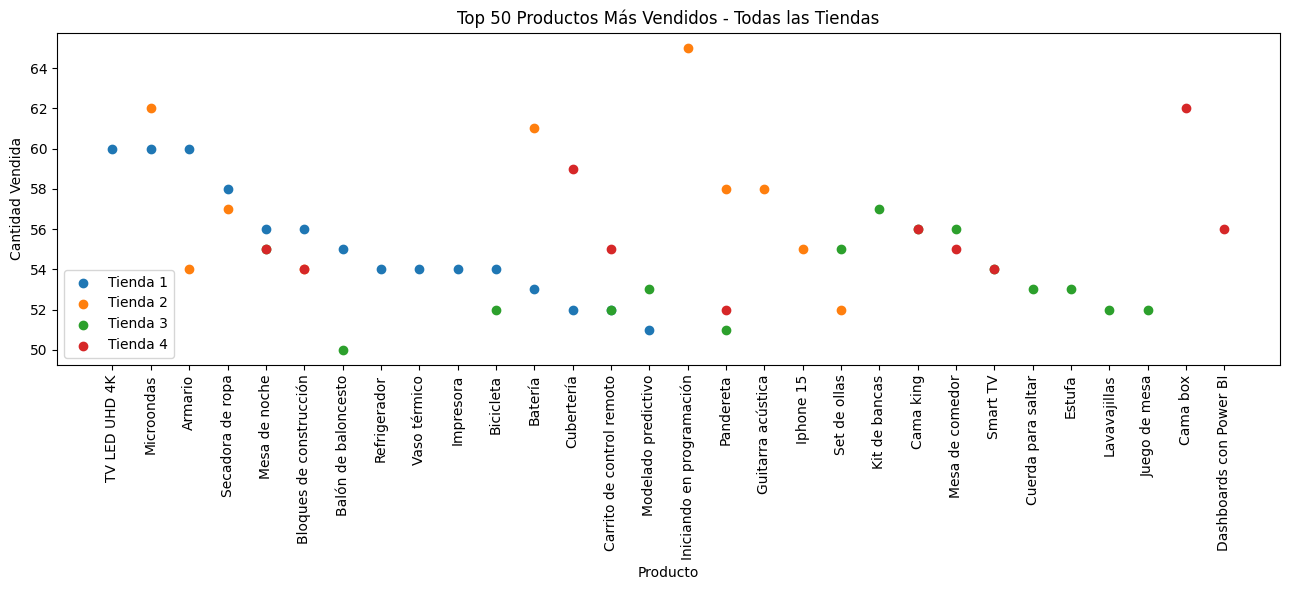  


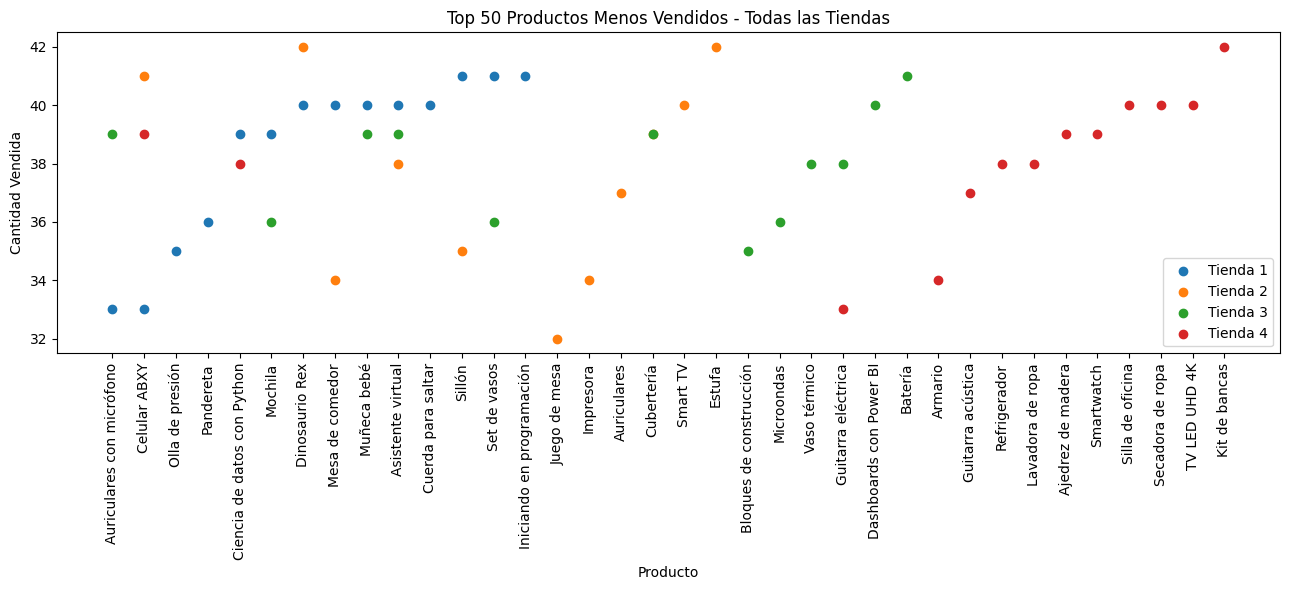

#### **5. Costo de Env√≠o Promedio**

El costo de env√≠o puede influir en la decisi√≥n de compra de los clientes. En este aspecto, la **Tienda 4** tiene una ventaja competitiva, ya que presenta el **costo de env√≠o promedio m√°s bajo**. Por el contrario, la **Tienda 1**, a pesar de ser la de mayores ingresos, tiene el costo de env√≠o m√°s elevado.

- **Tienda 1:** $26,018
    
- **Tienda 2:** $25,216
    
- **Tienda 3:** $24,805
    
- **Tienda 4:** $23,459
    

Aunque un costo de env√≠o bajo es positivo, no ha sido suficiente para impulsar las ventas de la Tienda 4 por encima de las dem√°s.

**Gr√°fico - Costo de Env√≠o Promedio por Tienda:** _El gr√°fico de barras facilita la comparaci√≥n directa a la proporci√≥n de costos._  


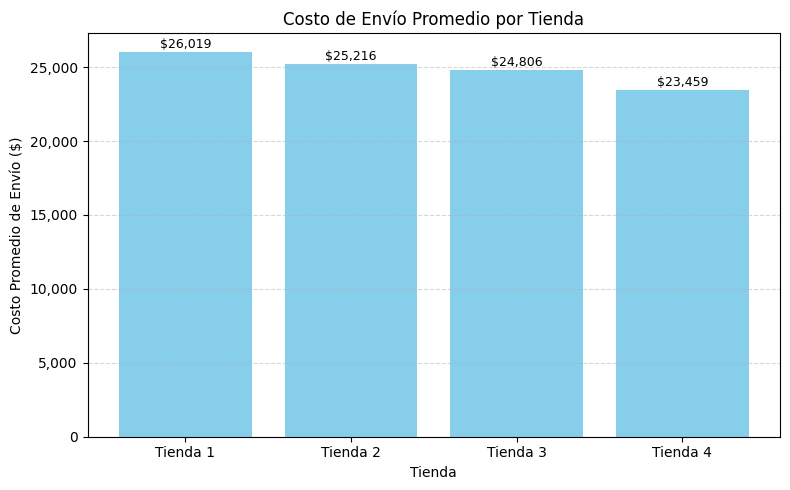

**Gr√°fico - Pastel:** _Distribucion de los costos de envio promedio por tienda_


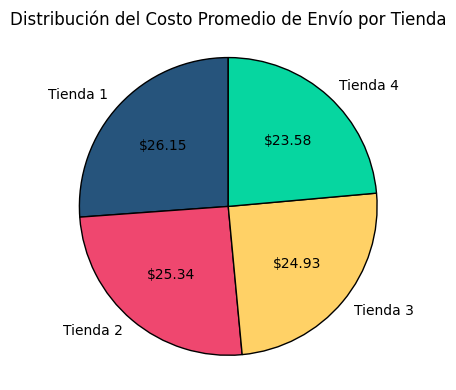

### **Conclusi√≥n y Recomendaci√≥n Final**

Tras un an√°lisis exhaustivo de los indicadores de rendimiento de las cuatro sucursales de Alura Store, la recomendaci√≥n es **vender la Tienda 4**.

#### **Justificaci√≥n de la Recomendaci√≥n**

La decisi√≥n se debido de varios factores clave que posicionan a la Tienda 4 como la menos eficiente y con el menor potencial de crecimiento de las tiendas:

1. **Ingresos Totales Insuficientes:** Este es el factor m√°s determinante. La Tienda 4 genera los **ingresos m√°s bajos** de todas las tiendas, con una diferencia de m√°s de $60$ millones respecto a su competidora m√°s cercana (Tienda 3) y m√°s de $112$ millones en comparaci√≥n con la tienda l√≠der (Tienda 1). Esta brecha financiera la convierte en la m√°s d√©bil.
    
2. **Baja Satisfacci√≥n del Cliente:** A pesar de que las diferencias son sutiles, su calificaci√≥n promedio se encuentra en el extremo inferior junto con la Tienda 1. Una combinaci√≥n de bajos ingresos y baja satisfacci√≥n del cliente es una se√±al de alerta importante.
    
3. **Rendimiento D√©bil en Categor√≠as Clave:** Si bien destaca en la venta de Juguetes, su rendimiento en la categor√≠a de **Electrodom√©sticos**, una de las m√°s importantes, es el m√°s bajo de todas las tiendas.
    

Aunque la Tienda 4 presenta el **costo de env√≠o promedio m√°s bajo**, esta ventaja no se ha traducido en un mayor volumen de ventas ni en ingresos superiores. Las otras tiendas, demuestran ser m√°s valiosas:

- **Tienda 1:** A pesar de sus altos costos de env√≠o y una calificaci√≥n mejorable, es la **fuente de ingresos m√°s grande** y, por lo tanto, fundamental para la estabilidad de la cadena.
    
- **Tiendas 2 y 3:** Son modelos de eficiencia equilibrada. Mantienen ingresos s√≥lidos y, crucialmente, gozan de la **mayor satisfacci√≥n del cliente**, lo que las convierte en tiendas estables y fiables a largo plazo.
    

En resumen, la venta de la Tienda 4 es la decisi√≥n m√°s l√≥gica y estrat√©gica, ya que permitir√≠a al Sr. Juan deshacerse de la tienda con menor rendimiento para invertir en un nuevo proyecto con mayor potencial de √©xito.

#### **6. Extra: An√°lisis del Desempe√±o Geogr√°fico**

Para complementar el an√°lisis, se realiz√≥ un estudio geogr√°fico utilizando las coordenadas de compra. Este an√°lisis explora c√≥mo la ubicaci√≥n impacta el volumen de ventas y el rendimiento general, utilizando herramientas de visualizaci√≥n como mapas de calor (`folium`) y gr√°ficos de dispersi√≥n (`matplotlib`).

##### **An√°lisis de la Concentraci√≥n de Ventas y Rendimiento**

El objetivo de este an√°lisis es identificar patrones geogr√°ficos en los datos de ventas para entender si el rendimiento de una tienda est√° fuertemente ligado a su ubicaci√≥n.

1. **Concentraci√≥n Geogr√°fica de Ventas:** El mapa de calor generado con los datos de todas las tiendas revela una fuerte concentraci√≥n de las ventas en √°reas geogr√°ficas espec√≠ficas.
**Gr√°fico - mapa de calor interactivo generado con Folium:** _Este mapa muestra las "zonas calientes" de ventas para todas la tiendas de Alura Store._

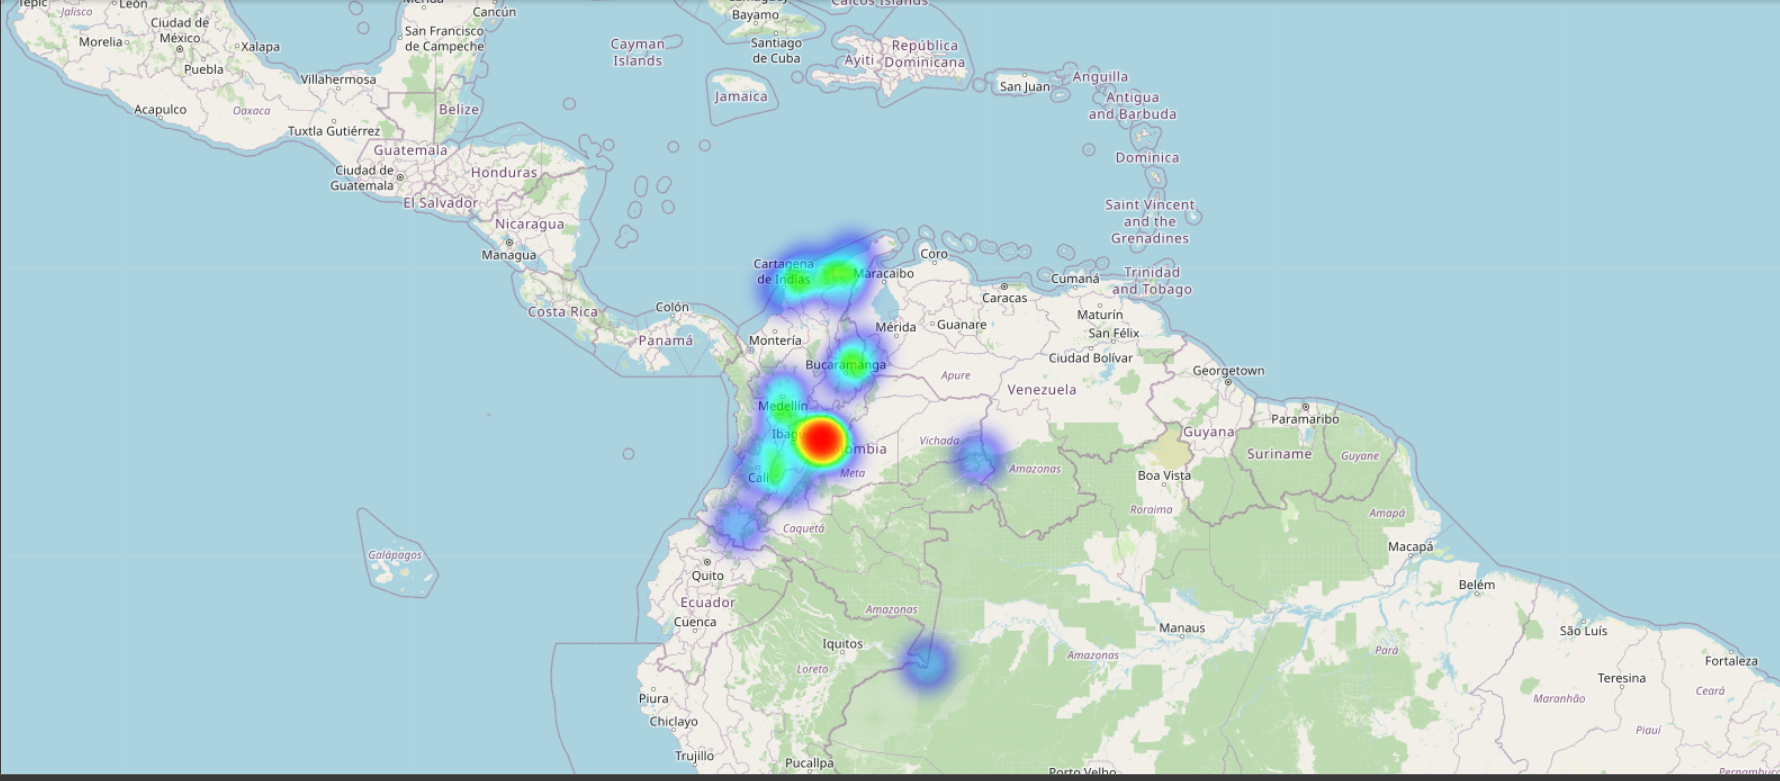

    
2. **Observaciones Clave por Ubicaci√≥n:** El an√°lisis de ventas por ciudad confirma lo que el mapa de calor sugiere:
    
    - **Ciudades Grandes:** **Bogot√°** y **Medell√≠n** son, con diferencia, las ciudades con el mayor volumen de ventas para todas las tiendas. Esto es esperable, dada su alta densidad de poblaci√≥n y actividad econ√≥mica.
        
    - **Rendimiento en Ciudades Peque√±as:** Ubicaciones como Armenia, C√∫cuta, Leticia y Pasto muestran un volumen de ventas considerablemente inferior en comparaci√≥n con las grandes capitales.
        
3. **Patrones y Factores Geogr√°ficos:**
    
    - **Urbano vs. Rural/Remoto:** Existe una clara divisi√≥n en el rendimiento. Las tiendas (o m√°s bien, las ventas en l√≠nea que se registran) en grandes ciudades como Bogot√°, Medell√≠n y Barranquilla superan ampliamente a las de ciudades m√°s peque√±as o de dif√≠cil acceso como Leticia.
        
    - **Influencia del Tr√°fico y Acceso:** El alto tr√°fico de personas y la mayor accesibilidad en las grandes ciudades son factores que probablemente impulsan las ventas. Las √°reas con menor demanda o con mayores desaf√≠os log√≠sticos presentan un rendimiento inferior.
        

**Gr√°ficos:** _El gr√°fico de dispersi√≥n que relaciona ventas y ubicaci√≥n (Gr√°fico 2) muestra c√≥mo las ventas totales (`Precio`) se distribuyen geogr√°ficamente, reforzando la idea de que la longitud y latitud (es decir, la ciudad) son determinantes en el volumen de ventas._

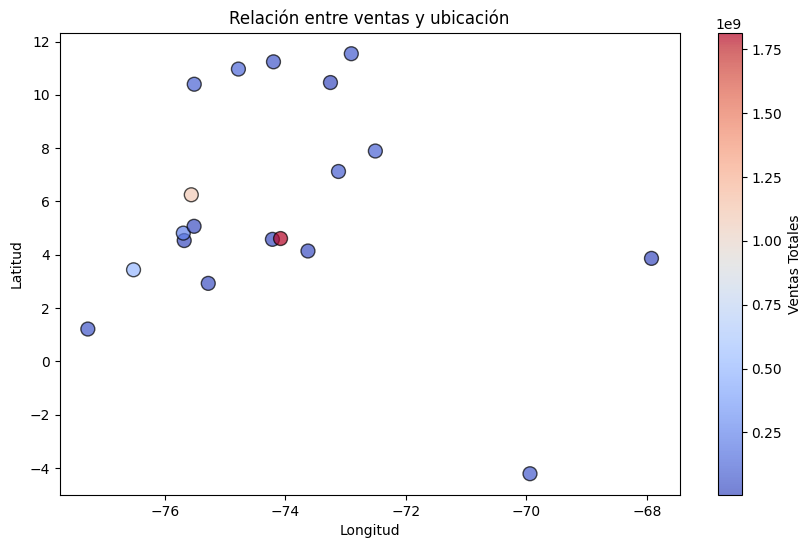

---


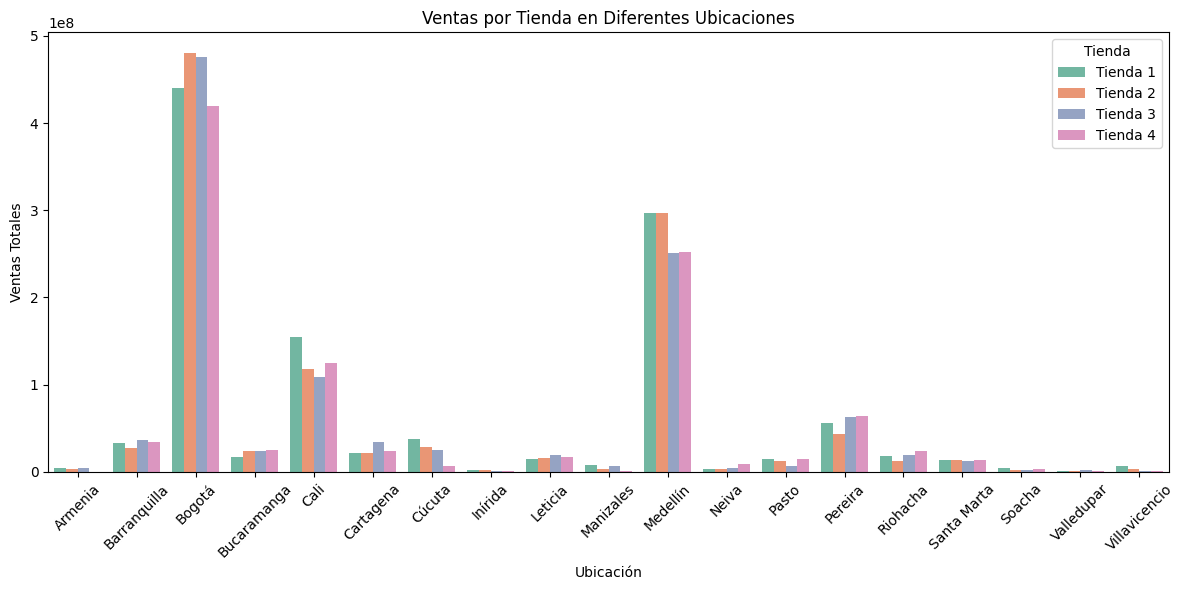

#### **Segunda Conclusi√≥n (Integrando el An√°lisis Geogr√°fico)**

La recomendaci√≥n inicial de **vender la Tienda 4** se mantiene y, de hecho, se ve **reforzada** por el an√°lisis geogr√°fico.

#### **Justificaci√≥n segundo an√°lisis**

El an√°lisis geogr√°fico demuestra que el √©xito de las ventas de Alura Store est√° fuertemente correlacionado con la **ubicaci√≥n**, grandes ciudades como Bogot√° y Medell√≠n son los principales ingresos de las tiendas. Todas las tiendas se benefician de estas ubicaciones de alto rendimiento y, a la inversa, todas muestran ventas m√°s bajas en ciudades m√°s peque√±as.

Esto es crucial por la siguiente raz√≥n: si el bajo rendimiento de la Tienda 4 se debiera a una mala estrategia de ubicaci√≥n (por ejemplo, si solo operara en ciudades peque√±as), la recomendaci√≥n podr√≠a ser reubicarla. Sin embargo, ya que todas las tiendas operan en las mismas ciudades, el problema de la Tienda 4 no es su ubicaci√≥n, sino su **rendimiento**.

En otras palabras, la Tienda 4 tiene acceso a las grandes ciudades (Bogot√°, Medell√≠n) que las otras tiendas, pero **no logra obtener el m√°ximo beneficio con la misma eficacia**. Sus **ingresos totales m√°s bajos**, su **calificaci√≥n de cliente inferior** y su **d√©bil desempe√±o en categor√≠as clave**, confirma que es la **Tienda** menos eficiente de la cadena.

Por lo tanto, la venta de la Tienda 4 sigue siendo la decisi√≥n m√°s s√≥lida. Vender la tienda de bajo rendimiento permitir√° al Sr. Juan centrarse en las tiendas m√°s fuertes y financiar nuevos proyectos con mayor probabilidad de √©xito.

# Gracias

In [156]:
%cd /content/desafio-alura-store
!git add .
!git commit -m "Desarrollo Challenge Alura Store - Python para Data Science / ONE - G8"
!git push origin main


/content/desafio-alura-store
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
